## TP 3 - Arbres de décision, SVM

Dans ce TP nous allons explorer deux nouveaux algorithmes supervisés de classification : les arbres de décision et les Support Vector Machines.

Importez les librairies de base dont nous aurons besoin, comme au TP précédent:

In [59]:
# import des outils mathématiques
import numpy as np

# import des outils d'affichage
import matplotlib.pyplot as plt

# import des outils de machine learning
import sklearn as skl
import sklearn.datasets as data


Arbres de Décision
--------

Les arbres de décision appliquent des seuils sur les attributs d'une instance $\mathbf{x_i} \in \mathbb{R}^d$ et ces décisions appliquées en cascade forment un arbre. Exécutez la cellule suivante qui en illustre le principe.

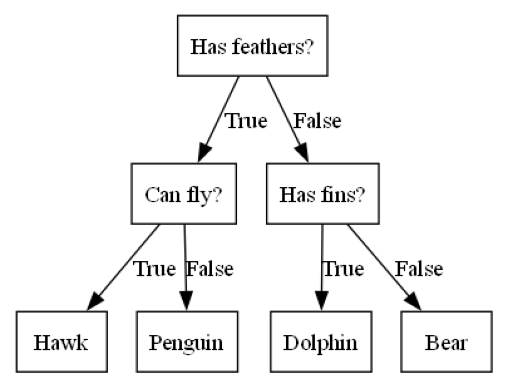

In [60]:
import mglearn
import graphviz
mglearn.plots.plot_animal_tree()

Cet exemple simple montre comment classer une instance dans 4 types d'animaux suivant une réponse binaire à une question. Un exemple plus complexe est montré par la cellule suivante. Interprétez le résultat présenté ainsi que la structure de l'arbre obtenu à chaque étape de l'algorithme.

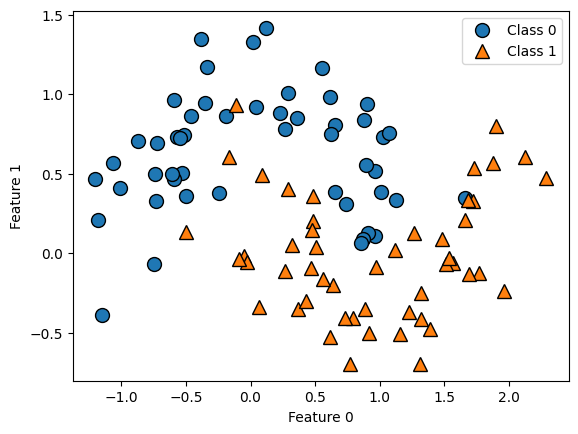

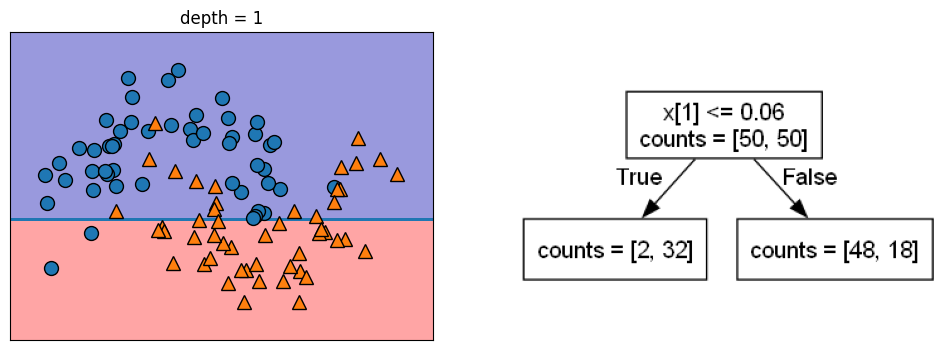

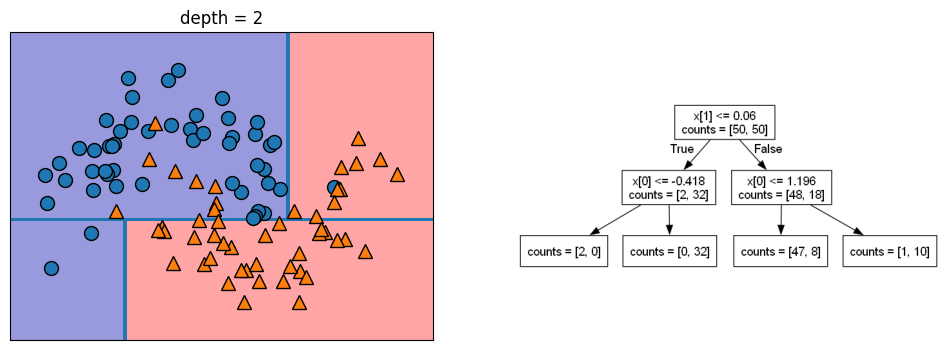

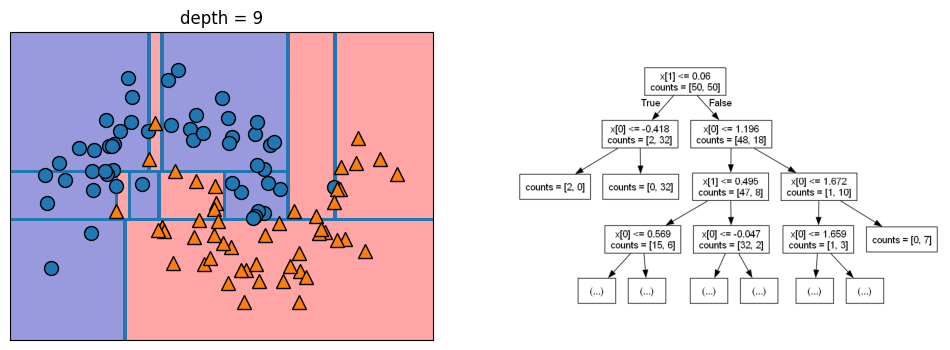

In [61]:
mglearn.plots.plot_tree_progressive()

Pour tester les arbres de décisions, commençons par les explorer pour un dataset synthétique. Nous utiliserons la fonction `make_blobs`
 de `sklearn.datasets`. Importez là (`from sklearn.datasets import make_blobs`) puis générez un dataset de 4 centres avec 300 instances. Les données générées (instances et labels) seront stockées dans deux tableaux nommés x et y. Affichez ces données à l'aide d'une fonction nommée `plot_data` prenant x et y en paramètres. Mettez une couleur différente par classe.


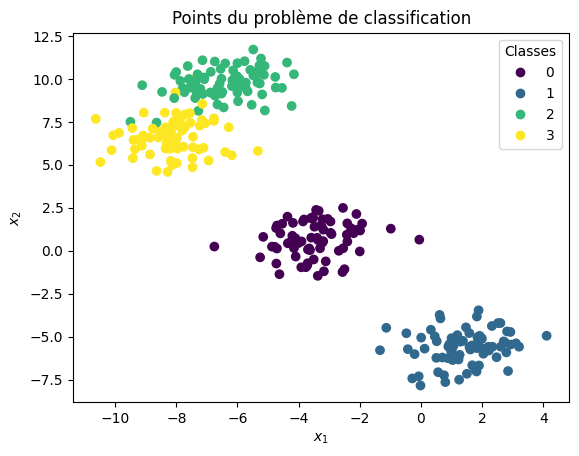

In [62]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Génération des données avec 4 centres et 300 instances
x, y = make_blobs(n_samples=300, centers=4)

# Fonction pour afficher les données
def plot_data(x, y):
    plt.title('Points du problème de classification')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    res = plt.scatter(x[:, 0], x[:, 1], marker='o', c=y, cmap='viridis')
    plt.legend(*res.legend_elements(), loc="upper right", title="Classes")
    plt.show()

# Affichage des données
plot_data(x, y)


Sur le dataset généré appliquez le classifieur `DecisionTreeClassifier()` (documentation à https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). L'usage est le même que dans le TP précédent avec `fit` pour réaliser l'apprentissage et `predict` pour effectuer une classification. Découpez les données en (x_train, y_train) (75% des données) et de test (x_test, y_test) (25% des données), faites un apprentissage sur les données x_train et affichez les performances sur x_train et x_test, ainsi que la matrice de confusion pour les données de test. Inspirez vous du TP précédent (attention il y a de nombreuses fonctions à importer).

Accuracy sur les données de test: 0.9555555555555556

Rapport de classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        23
           2       0.92      0.92      0.92        24
           3       0.90      0.90      0.90        21

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



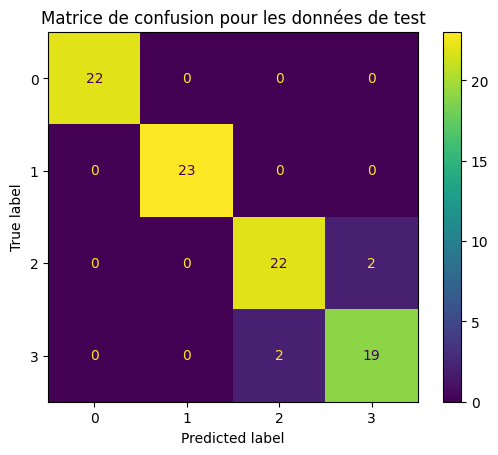

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

classifieur = DecisionTreeClassifier()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

classifieur.fit(x_train, y_train)

y_pred = classifieur.predict(x_test)

# Affichage des performances
print("Accuracy sur les données de test:", accuracy_score(y_test, y_pred))
print("\nRapport de classification:\n", classification_report(y_test, y_pred))

# Matrice de confusion
matrix_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix_test).plot()
plt.title("Matrice de confusion pour les données de test")
plt.show()

Maintenant que nous avons pu générer un arbre de décision, nous aimerions bien (comme dans la première figure d'illustration): 1) le visualiser, 2) visualiser la frontière de décision entre les classes. La fonction `export_graphviz` de `sklearn.tree` permet de générer une figure de l'arbre (voir documentation à https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html). Il est possible de l'afficher ensuite avec `display(graphviz.Source(figure))`. Générez une figure de l'arbre. Utilisez la fonction fournie `plot_contours` afin d'afficher les données et les frontières de décision.

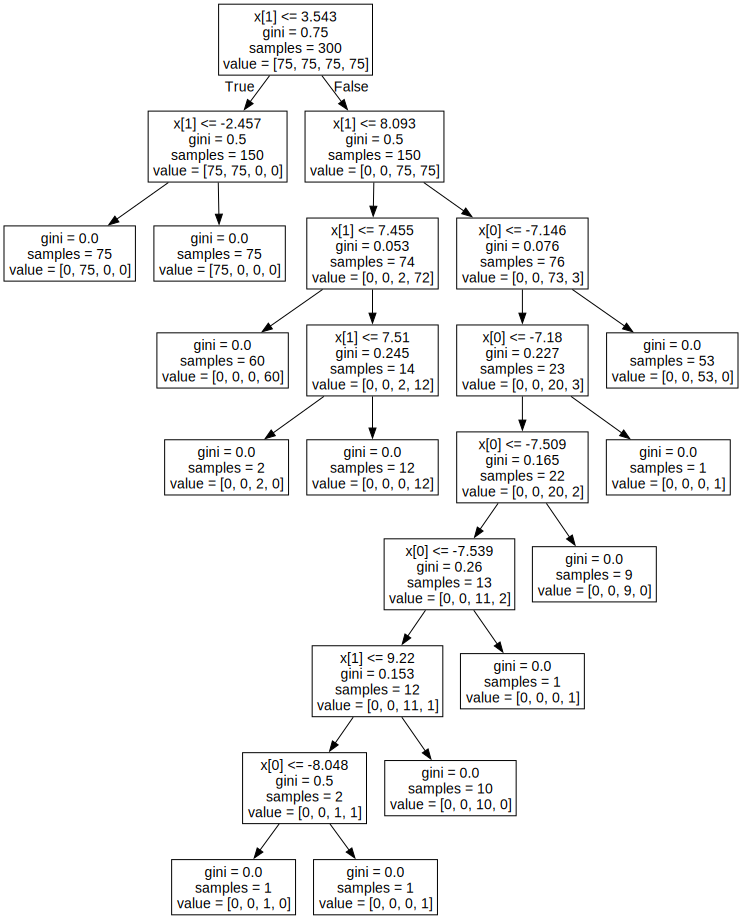

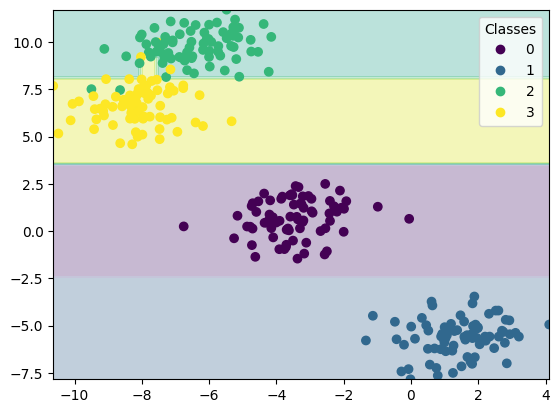

In [64]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import display

clf = tree.DecisionTreeClassifier().fit(x, y)

def plot_contours(x,y,tree):
    lengths, widths = np.meshgrid(np.linspace(np.min(x[:,0]),np.max(x[:,0]), 100), np.linspace(np.min(x[:,1]),np.max(x[:,1]), 100))
    all = np.c_[lengths.ravel(), widths.ravel()]
    y_pred = tree.predict(all).reshape(lengths.shape)
    plt.contourf(lengths, widths, y_pred,alpha=0.3)
    res=plt.scatter(x[:,0],x[:,1],marker='o', c=y)
    plt.legend(*res.legend_elements(),loc="upper right", title="Classes")
    
graph = export_graphviz(clf)
graphviz_fig = graphviz.Source(graph)
display(graphviz_fig)

plot_contours(x, y, clf)


Vous allez constater que certaines frontières de décision sont très découpées, ce qui peut être signe d'un sur-apprentissage. Il est possible de contrer cela en utilisant plusieurs arbres de décisions et en faisant la moyenne de leurs prédictions. Un tel classifieur est par exemple le `RandomForestClassifier` (de `sklearn.ensemble`). Faites l'apprentissage avec ce classifieur, affichez ses performances et la frontière de décision.

Accuracy : 1.0

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        75

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



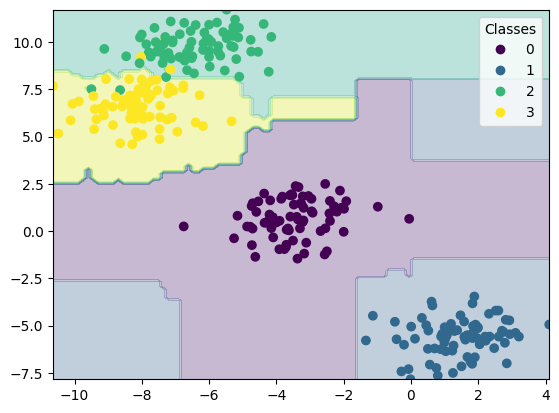

In [65]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42).fit(x, y)

y_pred_rf = random_forest.predict(x)

print("Accuracy :", accuracy_score(y, y_pred_rf))
print("\nRapport de classification :\n", classification_report(y, y_pred_rf))

plot_contours(x, y, random_forest)

Maintenant que vous savez utiliser un arbre de décision, appliquez cette technique sur les données iris. Chargez les avec `pandas`comme dans le TP précédent. Retenez uniqument les axes "petal length (cm)", "petal width (cm)" avec `x = iris.data[["petal length (cm)", "petal width (cm)"]].values`, affichez ses performances, l'arbre de décision et les frontières de décision. On peut imposer le nombre minimum d'élements qui sont retenus dans une feuille de l'arbre de décision (avec le paramètre `min_samples_leaf`). Testez son influence.

Accuracy avec min_samples_leaf=1 : 1.0


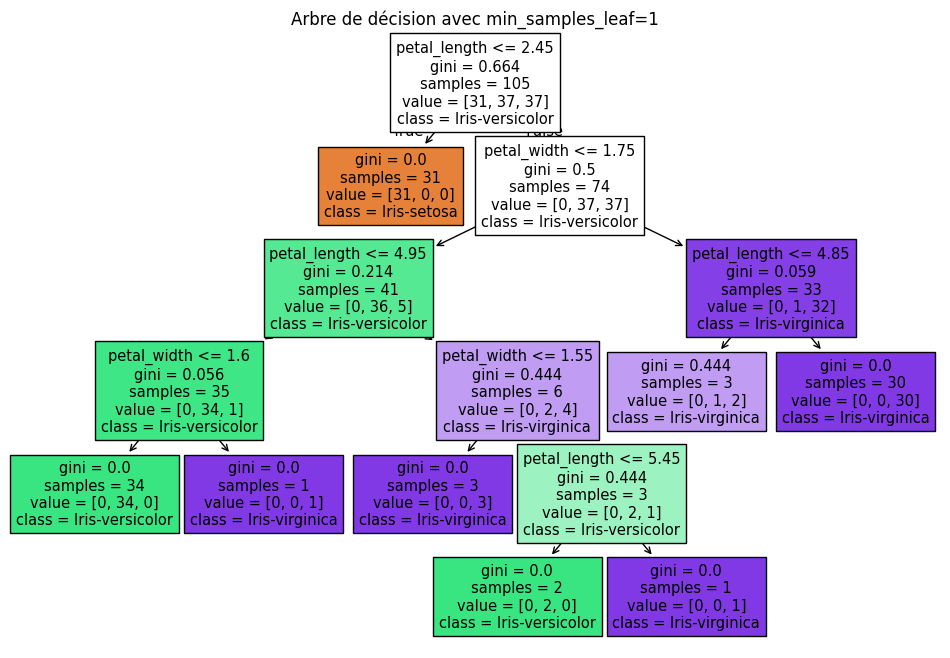

Accuracy avec min_samples_leaf=5 : 1.0


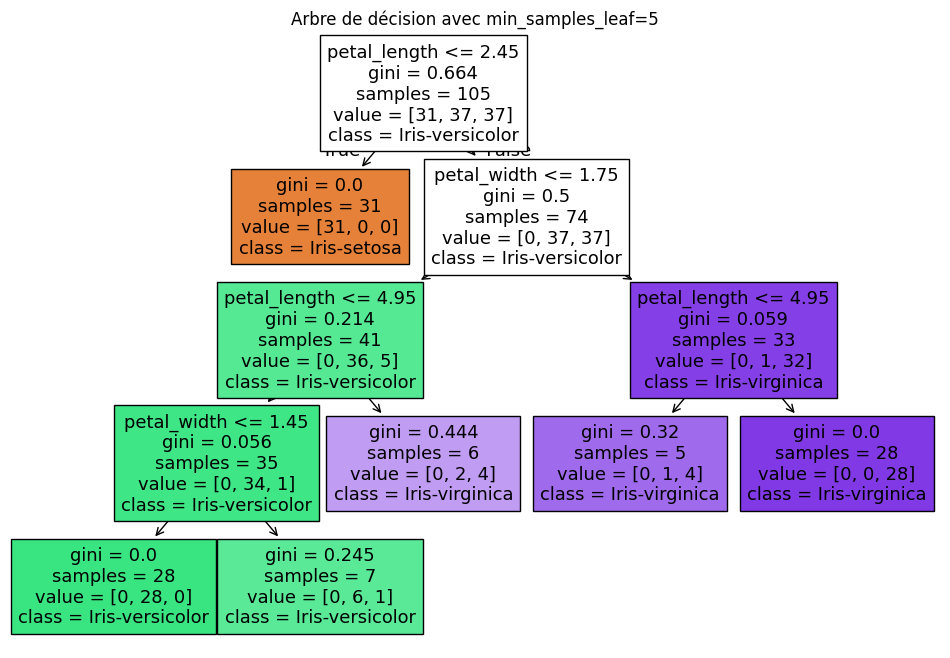

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Chargement des données à partir du fichier CSV
iris = pd.read_csv('iris.csv')

# Encodage des labels de classe
le = LabelEncoder()
y = le.fit_transform(iris["class"])

# Sélection des caractéristiques
x = iris[["petal_length", "petal_width"]].values

# Division des données en ensemble d'entraînement et de test
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialisation et apprentissage du classifieur avec min_samples_leaf=1
clf = DecisionTreeClassifier(min_samples_leaf=1, random_state=42)
clf.fit(x_train2, y_train2)

# Prédiction sur l'ensemble de test
y_pred2 = clf.predict(x_test2)

# Affichage de l'accuracy
print("Accuracy avec min_samples_leaf=1 :", accuracy_score(y_test2, y_pred2))

# Affichage de l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=["petal_length", "petal_width"], class_names=le.classes_, filled=True)
plt.title("Arbre de décision avec min_samples_leaf=1")
plt.show()

# Test avec un autre min_samples_leaf, par exemple min_samples_leaf=5
clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
clf2.fit(x_train2, y_train2)

# Prédiction et affichage de l'accuracy pour min_samples_leaf=5
y_pred3 = clf2.predict(x_test2)
print("Accuracy avec min_samples_leaf=5 :", accuracy_score(y_test2, y_pred3))

# Affichage de l'arbre de décision pour min_samples_leaf=5
plt.figure(figsize=(12, 8))
plot_tree(clf2, feature_names=["petal_length", "petal_width"], class_names=le.classes_, filled=True)
plt.title("Arbre de décision avec min_samples_leaf=5")
plt.show()


Nous allons utiliser à présent un Random Forest pour classer des images de nombres. La cellule suivante permet de charger un tel dataset et d'en afficher une partie.

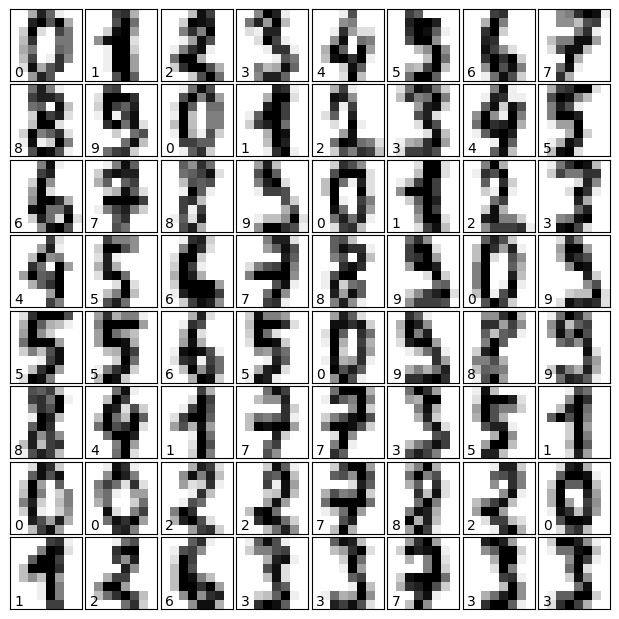

In [67]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()
fig = plt.figure(figsize=(6, 6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

Découpez les données en train/tests, Réalisez l'apprentissage d'un Random Forest (avec 1000 arbres), affichez les performances pour l'ensemble de test.

In [68]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Chargement des données Digits
digits = load_digits()
x = digits.data
y = digits.target

# Division des données en ensemble d'entraînement et de test
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialisation et apprentissage du classifieur RandomForest avec 1000 arbres
random_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
random_forest.fit(x_train3, y_train3)

# Prédiction sur l'ensemble de test
y_pred3 = random_forest.predict(x_test3)

# Affichage de l'accuracy sur l'ensemble de test
print("Accuracy sur l'ensemble de test :", accuracy_score(y_test3, y_pred3))


Accuracy sur l'ensemble de test : 0.9740740740740741


Support Vector Machines
--------

Avec la fonction `make_blobs` générez un dataset synthétique de deux classes avec 50 instances. Les données générées (instances et labels) seront stockées dans deux tableaux nommés x et y. Affichez ces données à l'aide de la fonction nommée `plot_data`.

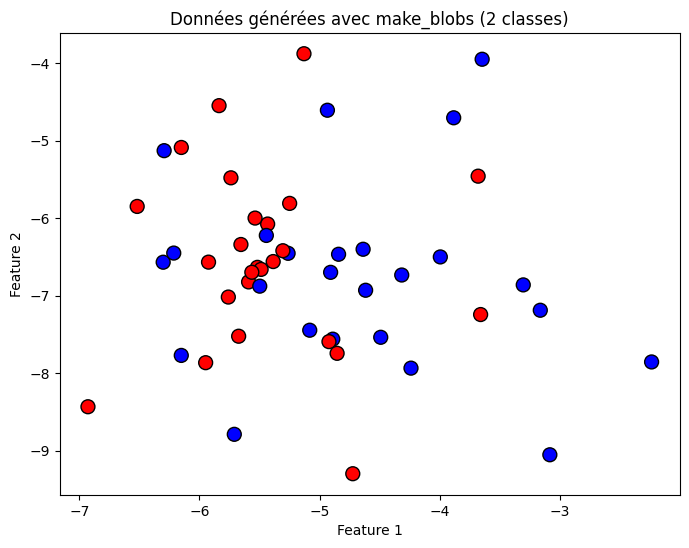

In [163]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Génération d'un dataset synthétique avec make_blobs
x, y = make_blobs(n_samples=50, centers=2)

# Fonction pour afficher les données
def plot_data(x, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', edgecolors='k', s=100)
    plt.title("Données générées avec make_blobs (2 classes)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Affichage des données générées
plot_data(x, y)


Le classifieur SVM se nomme SVC (Support Vector Classifier) dans scikit-learn (`from sklearn.svm import SVC`). Créez un SVC avec un noyau linéaire et la constante C à `1E10` (voir la documentation à https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Faites l'apprentissage sur les données `(x,y)`, affichez les vecteurs de support.

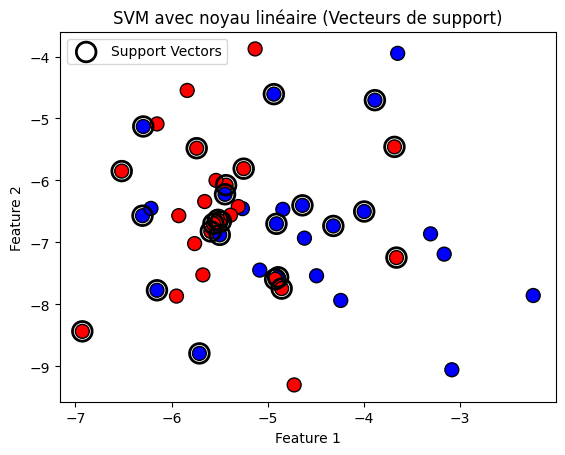

Vecteurs de support :
 [[-5.71001978 -8.79082392]
 [-4.90876613 -6.69949104]
 [-3.88511609 -4.70443182]
 [-5.44352299 -6.22323222]
 [-6.15105266 -7.77211943]
 [-4.8908726  -7.56233447]
 [-4.6384652  -6.40159502]
 [-6.30155904 -6.56890848]
 [-6.29358098 -5.12881486]
 [-4.93549964 -4.60685039]
 [-5.49834765 -6.87809696]
 [-4.31722568 -6.73416204]
 [-3.99624242 -6.50069421]
 [-5.43259088 -6.0759889 ]
 [-3.66102685 -7.24451842]
 [-6.51785379 -5.84877837]
 [-5.73806566 -5.47945067]
 [-5.59106662 -6.82326784]
 [-5.51766401 -6.63522845]
 [-4.92250342 -7.59432484]
 [-5.24962063 -5.80949149]
 [-4.85477103 -7.74505763]
 [-6.92731768 -8.43486501]
 [-3.68172186 -5.45811998]
 [-5.48696091 -6.66145562]
 [-5.56415171 -6.69862354]]


In [164]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# Création du classifieur SVC avec un noyau linéaire et C=1E10

svc = SVC(kernel='linear', C=1E10)

# Entraînement du classifieur sur les données (x, y)
svc.fit(x, y)

# Affichage des vecteurs de support
support_vectors = svc.support_vectors_

# Fonction pour afficher les données avec les vecteurs de support  
# Tracer les points des données
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', edgecolors='k', s=100)
    
# Tracer les vecteurs de support
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k', linewidths=2, label='Support Vectors')
    
plt.title("SVM avec noyau linéaire (Vecteurs de support)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
    
# Affichage de la légende
plt.legend()
plt.show()

# Affichage des vecteurs de support et des données

# Affichage des vecteurs de support dans la console
print("Vecteurs de support :\n", support_vectors)


La fonction suivante permet d'afficher la frontière de séparation pour un svm donné en paramètre, ainsi que les vecteurs de support. À l'aide de cette fonction affichez la frontière de séparation, après avoir affiché les point avec `plot_data`.

In [165]:
def plot_svc_decision_function(model):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # crée la grille pour évaluer le modèle
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot de la fonction de décision et des marges
    ax.contour(X, Y, P, levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    
    # plot des vecteurs support
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=300, linewidth=1, alpha=0.3, c='#FF0000')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

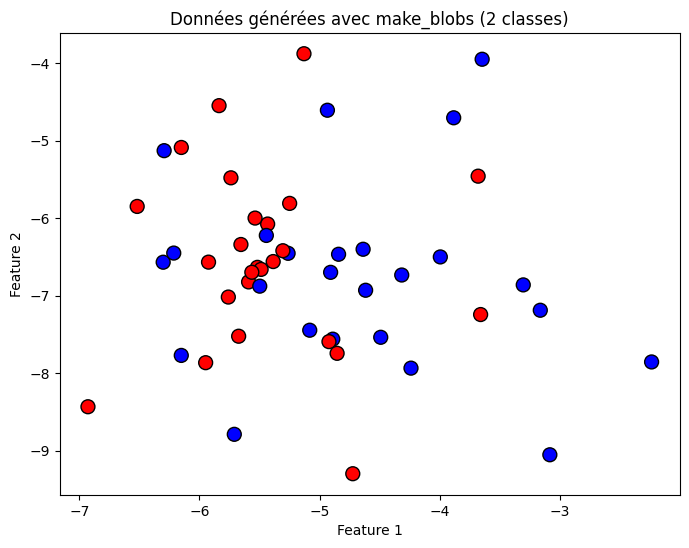

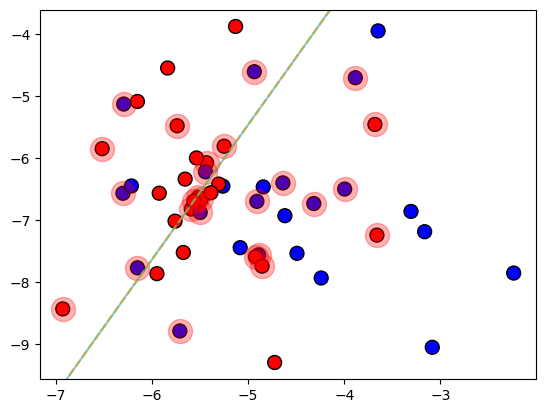

In [166]:
plot_data(x, y)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', edgecolors='k', s=100)
plot_svc_decision_function(svc)
plt.show()

Nous allons à présent générer un dataset qui n'est pas séparable linéairement (c-à-d qu'une droite ne peut pas séparer les deux classes).

In [167]:
x, y = data.make_circles(100, factor=.1, noise=.1)

Un SVM linéaire ne fonctionnera pas sur ce dataset, nous allons donc changer de noyau (kernel) et passer à un noyau rbf (noyau par défaut). Faites l'apprentissage d'un SVM rbf sur ce dataset et affichez la frontière de décision.

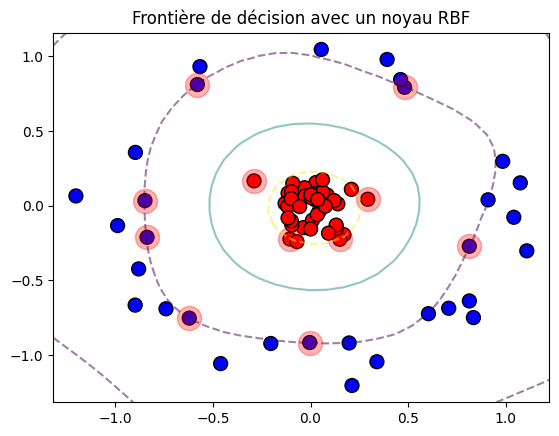

In [168]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Création d'un SVM avec un noyau rbf
svc = SVC(kernel='rbf')

# Division des données en ensemble d'entraînement et de test
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.3, random_state=42)

# Entraînement du SVM sur l'ensemble d'entraînement
svc.fit(x_train4, y_train4)

# Prédictions sur l'ensemble de test
y_pred4 = svc.predict(x_test4)

# Affichage des points de l'ensemble d'entraînement et de la frontière de décision
plt.scatter(x_train4[:, 0], x_train4[:, 1], c=y_train4, cmap='bwr', edgecolors='k', s=100)
plot_svc_decision_function(svc)
plt.title("Frontière de décision avec un noyau RBF")
plt.show()

# Si vous souhaitez afficher toutes les données (optionnel, hors de ta demande) :
# plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', edgecolors='k', s=100)
# plot_svc_decision_function(svc)
# plt.show()


Un noyau rbf a un paramètre nommé gamma dont le réglage peut s'avérer difficile. Un SVM a en plus un paramètre  de régularisation C. Trouver les meilleures valeurs pour ces deux paramètres n'est pas facile, mais l'on peut les ttrouver automatiquement à l'aide d'un grid search (une recherche en grille). À l'aide de la classe `GridSearchCV` https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html, trouvez les meilleurs paramètres parmi les configurations suivantes pour une fonction de coût de type `accuracy`: Noyau rbf avec gamma parmi [$10^{-1},10^{-2},10^{-3}$] et C parmi [$0.1,1,10,100$]. Le meilleur modèle est dans l'attribut `best_estimator_`. Affichez la frontière de décision obtenue avec ce meilleur estimateur.

Meilleurs paramètres : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


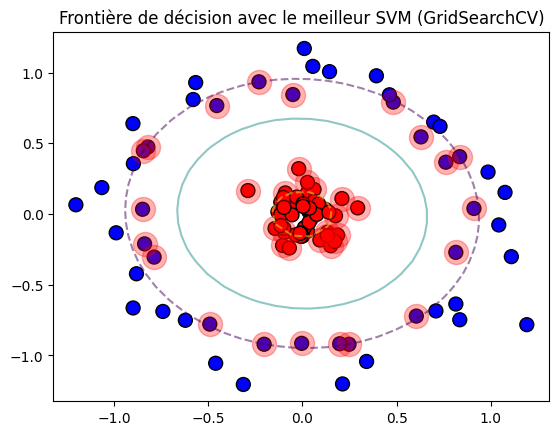

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Définition des hyperparamètres à tester dans la grille
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1e-1, 1e-2, 1e-3],
    'kernel': ['rbf']  # Nous fixons le noyau à RBF
}

# Création du classifieur SVM
svc = SVC()

# Configuration de GridSearchCV
grid_search = GridSearchCV(svc, param_grid)

# Entraînement de GridSearchCV sur les données
grid_search.fit(x, y)

# Récupération du meilleur modèle trouvé
best_model = grid_search.best_estimator_

# Affichage des meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)

# Affichage des points de données de l'ensemble d'entraînement
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', edgecolors='k', s=100)

# Affichage de la frontière de décision avec le meilleur modèle
plot_svc_decision_function(best_model)

# Affichage du graphe
plt.title("Frontière de décision avec le meilleur SVM (GridSearchCV)")
plt.show()


Chargez les données iris avec pandas, faites un découpage en train/test. Testez ensuite différents SVMs avec des noyaux polynomiaux ou rbf. Réglez les paramètres par un grid search. Affichez les performances en test et la matrice de confusion.

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



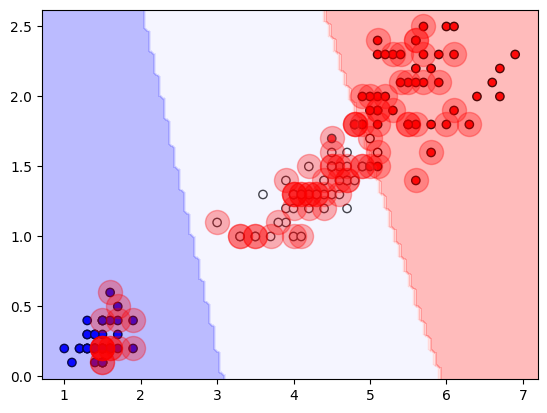

In [186]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_svc_decision_function(model):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Crée la grille pour évaluer le modèle
    x = np.linspace(xlim[0], xlim[1], 100)
    y = np.linspace(ylim[0], ylim[1], 100)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    # Utilisation de predict au lieu de decision_function
    Z = model.predict(xy).reshape(X.shape)
    
    # Affichage des zones de décision
    ax.contourf(X, Y, Z, alpha=0.3, cmap='bwr')
    
    # Affichage des vecteurs support
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
               s=300, linewidth=1, alpha=0.3, c='#FF0000')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



# Chargement des données à partir du fichier CSV
brut_data = pd.read_csv('iris.csv')

# Encodage des labels de classe
le = LabelEncoder()
y = le.fit_transform(brut_data["class"])

# Sélection des caractéristiques (longueur et largeur des pétales)
x = brut_data[["petal_length", "petal_width"]].values

# Division des données en ensembles d'entraînement et de test
x_train5, x_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.25)

# Initialisation du classifieur SVM
svc = SVC()

# Définition de la grille de paramètres pour la recherche
grid = {
    "C" : [0.1, 1, 10, 100],
    'gamma': [1e-1, 1e-2, 1e-3],
    'kernel': ['rbf']  # Noyau RBF
}

# Recherche du meilleur modèle avec GridSearchCV
search = GridSearchCV(svc, grid)
search.fit(x_train5, y_train5)

# Meilleur modèle trouvé
best_model = search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred5 = best_model.predict(x_test5)

# Affichage de l'accuracy et du rapport de classification
print(f"Accuracy: {accuracy_score(y_test5, y_pred5)}")
print(classification_report(y_test5, y_pred5))

# Affichage des points et de la frontière de décision
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="bwr", edgecolors="k")
plot_svc_decision_function(best_model)
plt.show()




Appliquez un SVM rbf sur le problème de classification des digits précédent. Réglez automatiquement les paramètres. Affichez les performances en test. Est-ce mieux que le RandomForest ?